In [2]:
%reload_ext autoreload
%autoreload 2
from backend import load_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
client_profiles, df_web_data_pt1, df_web_data_pt2, experiment_roster, digital_footprints, client_footprints, grouped_data = load_data()

In [4]:
experiment_roster.dropna(inplace=True)

In [5]:
experiment_roster

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


# Not all clients were part of experiment

In [92]:
web_group = pd.concat([df_web_data_pt1,df_web_data_pt2])

In [93]:
process_dict = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
web_group['process_step'] = web_group['process_step'].replace(process_dict)

In [94]:
web_group

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


In [95]:
web_group['visit_id'].nunique()

158095

In [96]:
web_group['visitor_id'].nunique()

130236

In [97]:
web_group['client_id'].nunique()

120157

In [98]:
web_group['process_step'].nunique()

5

In [99]:
web_group['date_time'].nunique()

629363

In [100]:
client_process_counts = web_group.groupby('client_id')['process_step'].value_counts().unstack(fill_value=0)

In [103]:
client_process_counts

process_step,0,1,2,3,4
client_id,,,,,
169,1,1,1,1,1
336,2,0,0,0,0
546,1,1,1,1,1
555,1,1,1,1,1
647,1,1,1,1,1
...,...,...,...,...,...
9999729,4,3,2,1,1
9999768,3,3,3,2,1
9999832,1,1,0,0,0


In [106]:
column_rename = {0: 'start', 1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}
client_process_counts = client_process_counts.rename(columns=column_rename)

In [107]:
client_process_counts

process_step,start,step_1,step_2,step_3,confirm
client_id,,,,,
169,1,1,1,1,1
336,2,0,0,0,0
546,1,1,1,1,1
555,1,1,1,1,1
647,1,1,1,1,1
...,...,...,...,...,...
9999729,4,3,2,1,1
9999768,3,3,3,2,1
9999832,1,1,0,0,0


In [108]:
final_rooster_process_counts = pd.merge(client_process_counts, experiment_roster, on='client_id', how='inner')

In [109]:
final_rooster_process_counts_profile = pd.merge(final_rooster_process_counts, client_profiles, on='client_id', how='inner')

In [110]:
final_rooster_process_counts_profile

,client_id,start,step_1,step_2,step_3,confirm,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,1,1,1,1,1,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,647,1,1,1,1,1,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0
2,934,4,0,0,0,0,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0
3,1028,1,5,2,1,0,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
4,1104,2,0,0,0,0,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,9999150,2,1,0,0,0,Test,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0
50496,9999400,1,1,1,1,1,Test,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0
50497,9999626,1,1,0,0,0,Test,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0
50498,9999729,4,3,2,1,1,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0


In [111]:
control_df = final_rooster_process_counts[final_rooster_process_counts['Variation'] == 'Control']
test_df = final_rooster_process_counts[final_rooster_process_counts['Variation'] == 'Test']

In [112]:
control_df

,client_id,start,step_1,step_2,step_3,confirm,Variation
3,1028,1,5,2,1,0,Control
4,1104,2,0,0,0,0,Control
5,1186,2,1,1,0,0,Control
6,1195,1,1,1,1,1,Control
7,1197,1,1,2,2,1,Control
...,...,...,...,...,...,...,...
50485,9997125,1,1,1,1,1,Control
50486,9997391,1,1,3,3,0,Control
50487,9997470,8,4,2,2,1,Control
50489,9998346,1,2,4,4,1,Control


In [113]:
test_df

,client_id,start,step_1,step_2,step_3,confirm,Variation
0,555,1,1,1,1,1,Test
1,647,1,1,1,1,1,Test
2,934,4,0,0,0,0,Test
8,1336,1,1,1,1,3,Test
9,1346,5,2,1,2,0,Test
...,...,...,...,...,...,...,...
50495,9999150,2,1,0,0,0,Test
50496,9999400,1,1,1,1,1,Test
50497,9999626,1,1,0,0,0,Test
50498,9999729,4,3,2,1,1,Test


In [114]:
(test_df['confirm'] > 0).value_counts()

confirm
True     18687
False     8281
Name: count, dtype: int64

In [115]:
(control_df['confirm'] > 0).value_counts()

confirm
True     15434
False     8098
Name: count, dtype: int64

In [116]:
web_group_experiment = pd.merge(web_group, experiment_roster, on='client_id', how='inner')

In [117]:
web_group_experiment

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,Control


In [118]:
client_profile_experiment = pd.merge(web_group_experiment, client_profiles, on='client_id', how='left')
client_profile_experiment

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [119]:
sorted_df = web_group_experiment.sort_values(by=['client_id', 'date_time'])
result = sorted_df.groupby('client_id')['date_time'].diff()

In [120]:
sorted_df.query('client_id == 647')

,client_id,visitor_id,visit_id,process_step,date_time,Variation
147820,647,66758770_53988066587,40369564_40101682850_311847,0,2017-04-12 15:41:28,Test
147819,647,66758770_53988066587,40369564_40101682850_311847,1,2017-04-12 15:41:35,Test
147818,647,66758770_53988066587,40369564_40101682850_311847,2,2017-04-12 15:41:53,Test
147817,647,66758770_53988066587,40369564_40101682850_311847,3,2017-04-12 15:45:02,Test
147816,647,66758770_53988066587,40369564_40101682850_311847,4,2017-04-12 15:47:45,Test


In [123]:
def calculate_completion_rate(data,variation=None):

    if (variation == 'Test') or (variation == 'Control'):
        variation_df = data[data['Variation']== variation]
        confirm_step_users = variation_df[variation_df['process_step'] == 4]['client_id'].nunique()
        total_users = variation_df['client_id'].nunique()
        
    else:
        confirm_step_users = data[data['process_step'] == 4]['client_id'].nunique()
        total_users = data['client_id'].nunique()

    completion_rate_percentage = (confirm_step_users / total_users) * 100

    return completion_rate_percentage

In [124]:
calculate_completion_rate(web_group_experiment,'Control')

65.58728539860616

In [125]:
calculate_completion_rate(web_group_experiment,'Test')

69.29323642835953

In [126]:
def calculate_avg_time_per_step(data,variation=None):
    
    if (variation == 'Test') or (variation == 'Control'):
        
        variation_df = data[data['Variation']== variation]
        variation_df['time_spent_on_step'] = variation_df.groupby('client_id')['date_time'].diff()
        avg_time_per_step = variation_df.groupby('process_step')['time_spent_on_step'].mean()
        avg_time_per_step = avg_time_per_step.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])
    else:
        
        data['time_spent_on_step'] = data.groupby('client_id')['date_time'].diff()
        avg_time_per_step = data.groupby('process_step')['time_spent_on_step'].mean()
        avg_time_per_step = avg_time_per_step.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])
        
    return avg_time_per_step

In [131]:
#sorted_df = web_group_experiment.sort_values(by=['client_id', 'date_time'])

control_time_spent = sorted_df[sorted_df['Variation']=='Control']

control_time_spent['time_spent_on_step'] = control_time_spent.groupby('client_id')['date_time'].diff()

avg_time_per_step_control = control_time_spent.groupby('process_step')['time_spent_on_step'].mean()

index_rename = {0: 'start', 1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}

avg_time_per_step_control = avg_time_per_step_control.rename(index=index_rename)

#avg_time_per_step_control = avg_time_per_step_control.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])

avg_time_per_step_control

/var/folders/l6/ynlhkqws5hv7wtyyn6rr6t4c0000gn/T/ipykernel_807/3099442970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_time_spent['time_spent_on_step'] = control_time_spent.groupby('client_id')['date_time'].diff()


process_step
start     4 days 05:57:44.544592030
step_1    0 days 00:30:38.781647281
step_2    0 days 00:00:39.342259834
step_3    0 days 00:09:35.220494575
confirm   0 days 18:21:17.307379630
Name: time_spent_on_step, dtype: timedelta64[ns]

In [132]:
test_time_spent = sorted_df[sorted_df['Variation']=='Test']

test_time_spent['time_spent_on_step'] = test_time_spent.groupby('client_id')['date_time'].diff()

avg_time_per_step_test = test_time_spent.groupby('process_step')['time_spent_on_step'].mean()

index_rename = {0: 'start', 1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}

avg_time_per_step_test = avg_time_per_step_test.rename(index=index_rename)

# avg_time_per_step_test = avg_time_per_step_test.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])

avg_time_per_step_test

/var/folders/l6/ynlhkqws5hv7wtyyn6rr6t4c0000gn/T/ipykernel_807/2488044916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_time_spent['time_spent_on_step'] = test_time_spent.groupby('client_id')['date_time'].diff()


process_step
start     3 days 02:55:49.873986735
step_1    0 days 00:22:19.804570955
step_2    0 days 00:01:51.212471355
step_3    0 days 00:12:18.920516488
confirm   1 days 05:00:32.783103231
Name: time_spent_on_step, dtype: timedelta64[ns]

In [135]:
sorted_df['time_spent_on_step'] = sorted_df.groupby('client_id')['date_time'].diff()

avg_time_per_step = sorted_df.groupby('process_step')['time_spent_on_step'].mean()

index_rename = {0: 'start', 1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}

avg_time_per_step = avg_time_per_step.rename(index=index_rename)

#avg_time_per_step = avg_time_per_step.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])

avg_time_per_step

process_step
start     3 days 15:02:39.424504584
step_1    0 days 00:25:56.019441799
step_2    0 days 00:01:18.503631663
step_3    0 days 00:11:02.287741086
confirm   1 days 00:40:39.014174987
Name: time_spent_on_step, dtype: timedelta64[ns]

In [35]:
calculate_avg_time_per_step(web_group_experiment)

process_step
start     0 days 10:34:55.327400221
step_1    0 days 04:44:40.800457751
step_2    0 days 01:26:44.953561331
step_3    0 days 02:33:59.386640609
confirm   7 days 06:23:06.917887202
Name: time_spent_on_step, dtype: timedelta64[ns]

In [36]:
calculate_avg_time_per_step(web_group_experiment,'Test')

/var/folders/l6/ynlhkqws5hv7wtyyn6rr6t4c0000gn/T/ipykernel_807/1006983066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variation_df['time_spent_on_step'] = variation_df.groupby('client_id')['date_time'].diff()


process_step
start     0 days 09:17:27.053622956
step_1    0 days 02:54:46.601001033
step_2    0 days 01:35:27.801749659
step_3    0 days 02:54:23.903277084
confirm   5 days 23:26:23.550332778
Name: time_spent_on_step, dtype: timedelta64[ns]

In [37]:
calculate_avg_time_per_step(web_group_experiment,'Control')

/var/folders/l6/ynlhkqws5hv7wtyyn6rr6t4c0000gn/T/ipykernel_807/1006983066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variation_df['time_spent_on_step'] = variation_df.groupby('client_id')['date_time'].diff()


process_step
start     0 days 12:08:42.464061324
step_1    0 days 07:11:47.159839796
step_2    0 days 01:16:10.175066634
step_3    0 days 02:10:09.278050173
confirm   9 days 12:45:21.393020281
Name: time_spent_on_step, dtype: timedelta64[ns]

In [140]:
merged_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_diff
77131,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,NaT
77130,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,0 days 00:00:07
77129,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,Test,0 days 00:00:32
77128,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,Test,0 days 00:01:39
77127,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,Test,0 days 00:00:20
...,...,...,...,...,...,...,...
114789,9999729,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:40,Test,0 days 00:00:10
114788,9999729,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:09:19,Test,0 days 00:00:39
114787,9999729,834634258_21862004160,870243567_56915814033_814203,4,2017-05-08 16:09:40,Test,0 days 00:00:21
264543,9999832,145538019_54444341400,472154369_16714624241_585315,0,2017-05-16 16:46:03,Test,NaT


In [141]:

merged_web_data = web_group_experiment.sort_values(by=['client_id', 'date_time'])

merged_web_data['time_diff'] = merged_web_data.groupby('client_id')['date_time'].diff()

merged_web_data = merged_web_data[merged_web_data['process_step'] != 0]

merged_web_data[['client_id', 'process_step', 'date_time', 'time_diff','Variation']]

,client_id,process_step,date_time,time_diff,Variation
77130,555,1,2017-04-15 12:58:03,0 days 00:00:07,Test
77129,555,2,2017-04-15 12:58:35,0 days 00:00:32,Test
77128,555,3,2017-04-15 13:00:14,0 days 00:01:39,Test
77127,555,4,2017-04-15 13:00:34,0 days 00:00:20,Test
147819,647,1,2017-04-12 15:41:35,0 days 00:00:07,Test
...,...,...,...,...,...
114790,9999729,1,2017-05-08 16:08:30,0 days 00:00:05,Test
114789,9999729,2,2017-05-08 16:08:40,0 days 00:00:10,Test
114788,9999729,3,2017-05-08 16:09:19,0 days 00:00:39,Test
114787,9999729,4,2017-05-08 16:09:40,0 days 00:00:21,Test


In [143]:
merged_web_data_test = merged_web_data[merged_web_data['Variation']=='Test']

In [144]:
merged_web_data_control = merged_web_data[merged_web_data['Variation']=='Control']

In [146]:
average_time_per_step_control = merged_web_data_control.groupby('process_step')['time_diff'].mean()

index_rename = {1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}

average_time_per_step_control = average_time_per_step_control.rename(index=index_rename)

average_time_per_step_control

process_step
step_1    0 days 00:30:38.781647281
step_2    0 days 00:00:39.342259834
step_3    0 days 00:09:35.220494575
confirm   0 days 18:21:17.307379630
Name: time_diff, dtype: timedelta64[ns]

In [147]:
average_time_per_step_test = merged_web_data_test.groupby('process_step')['time_diff'].mean()

index_rename = {1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}

average_time_per_step_test = average_time_per_step_test.rename(index=index_rename)

average_time_per_step_test

process_step
step_1    0 days 00:22:19.804570955
step_2    0 days 00:01:51.212471355
step_3    0 days 00:12:18.920516488
confirm   1 days 05:00:32.783103231
Name: time_diff, dtype: timedelta64[ns]

In [127]:
def calculate_error_rate(data,variation=None):

    if (variation == 'Test') or (variation == 'Control'):
        variation_df = data[data['Variation']== variation]
        total_users_at_step = variation_df['client_id'].groupby(variation_df['process_step']).nunique()
        backward_steps = variation_df[variation_df['process_step'].shift(1) > variation_df['process_step']]
        users_proceeding_to_next_step = variation_df.groupby('process_step')['client_id'].nunique().shift(-1)
        users_took_backward_steps = backward_steps.groupby('process_step')['client_id'].nunique()
        
        #Overall Error Rate
        total_users_took_backward_steps = variation_df[variation_df['process_step'].shift(1) > variation_df['process_step']]['client_id'].nunique()
        total_users = variation_df['client_id'].nunique()

    else:
        total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()
        backward_steps = data[data['process_step'].shift(1) > data['process_step']]
        users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)
        users_took_backward_steps = backward_steps.groupby('process_step')['client_id'].nunique()
        
        # Overall Error Rate
        total_users_took_backward_steps = data[data['process_step'].shift(1) > data['process_step']]['client_id'].nunique()
        total_users = data['client_id'].nunique()
        

    error_rate_percentage = (users_took_backward_steps / total_users_at_step) * 100
    error_rate_percentage = error_rate_percentage.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])
    
    overall_error_rate_percentage = (total_users_took_backward_steps / total_users) * 100
    
    return error_rate_percentage, overall_error_rate_percentage

In [128]:
calculate_error_rate(web_group_experiment)

(process_step
 start      88.515457
 step_1     91.933632
 step_2     92.644471
 step_3           NaN
 confirm    96.782040
 Name: client_id, dtype: float64,
 88.77029702970297)

In [129]:
calculate_error_rate(web_group_experiment,'Control')

(process_step
 start      85.908450
 step_1     92.397777
 step_2     92.375335
 step_3           NaN
 confirm    98.121031
 Name: client_id, dtype: float64,
 86.19751827298997)

In [130]:
calculate_error_rate(web_group_experiment,'Test')

(process_step
 start      90.824244
 step_1     91.519347
 step_2     92.852008
 step_3           NaN
 confirm    95.504896
 Name: client_id, dtype: float64,
 91.02640166122812)

In [54]:
merged_web_data.query("process_step == 'confirm' & error == 1")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_spent_on_step,time_diff,error
77127,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,NaT,0 days 00:00:20,1
147816,647,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,Test,NaT,0 days 00:02:43,1
14441,1195,766842522_69992551638,393817425_39015278493_996341,confirm,2017-04-05 20:19:31,Control,NaT,0 days 00:01:23,1
34092,1197,753759429_54481946928,71862471_21202285428_848395,confirm,2017-04-01 17:17:59,Control,NaT,0 days 00:00:17,1
311783,1336,920624746_32603333901,583743392_96265099036_939815,confirm,2017-05-08 06:08:43,Test,-1 days +21:47:05,0 days 00:01:49,1
...,...,...,...,...,...,...,...,...,...
146060,9998851,660529049_81285947655,310744937_17135608286_213964,confirm,2017-04-05 12:08:43,Test,NaT,0 days 00:00:31,1
106318,9998964,502193753_63097042630,699981922_52880598802_858635,confirm,2017-04-05 23:50:02,Test,NaT,0 days 00:01:14,1
42685,9999009,212849256_28644888524,149965839_24823291142_245569,confirm,2017-03-31 07:20:36,Test,NaT,0 days 00:01:58,1
193892,9999400,915967319_19082377501,288904166_90826265353_276104,confirm,2017-04-20 05:23:27,Test,NaT,0 days 00:00:24,1


In [166]:

error_test_1 = web_group_experiment.sort_values(by=['client_id', 'date_time'])


error_mask = error_test_1.groupby('client_id')['process_step'].shift(1) > error_test_1['process_step']


total_errors = error_mask.sum()


total_steps = error_test_1.shape[0]


error_rate = total_errors / total_steps *100


average_error_per_step = error_mask.groupby(web_group_experiment['process_step']).mean()*100


print("Total Errors:", total_errors)
print("Total Steps:", total_steps)
print("Error Rate:", error_rate)
average_error_per_step

Total Errors: 32423
Total Steps: 321309
Error Rate: 10.090909373842626


process_step
0    20.933495
1     8.480916
2     8.214505
3     0.326562
4     0.000000
Name: process_step, dtype: float64

In [131]:
def calculate_ctr(data,variation=None):
    
    if (variation == 'Test') or (variation == 'Control'):
        variation_df = data[data['Variation']== variation]
        total_users_at_step = variation_df['client_id'].groupby(variation_df['process_step']).nunique()
        users_proceeding_to_next_step = variation_df.groupby('process_step')['client_id'].nunique().shift(-1)

    else:
        total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()
        users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)
    
    
    users_proceeding_to_next_step = users_proceeding_to_next_step.fillna(0)
    
    ctr = (users_proceeding_to_next_step / total_users_at_step)*100
    ctr = ctr.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])


    return ctr

In [132]:
calculate_ctr(web_group_experiment)

process_step
start       88.703171
step_1      92.095725
step_2      93.632052
step_3       0.000000
confirm    146.760060
Name: client_id, dtype: float64

In [133]:
calculate_ctr(web_group_experiment,'Control')

process_step
start       86.130701
step_1      92.546645
step_2      93.415550
step_3       0.000000
confirm    151.593884
Name: client_id, dtype: float64

In [134]:
calculate_ctr(web_group_experiment,'Test')

process_step
start       90.959181
step_1      91.721268
step_2      93.813460
step_3       0.000000
confirm    142.767699
Name: client_id, dtype: float64

In [168]:
# Assuming your DataFrame is named merged_web_data
# Sort the DataFrame by 'client_id' and 'date_time'
ctr_test_1 = web_group_experiment.sort_values(by=['client_id', 'date_time'])

# Create a boolean mask for successful click-through events
ctr_mask = (ctr_test_1['process_step'].shift(1) == 'start') & ((ctr_test_1['process_step'] == 'step_1') | (ctr_test_1['process_step'] == 'step_2'))

# Count the number of successful click-through events
successful_ctr_events = ctr_mask.sum()

# Count the total number of possible click-through events
total_possible_ctr_events = (ctr_test_1['process_step'] == 'start').sum()

# Calculate the click-through-rate
ctr_rate = successful_ctr_events / total_possible_ctr_events

# Displaying the result
print("Successful CTR Events:", successful_ctr_events)
print("Total Possible CTR Events:", total_possible_ctr_events)
print("Click-Through-Rate:", ctr_rate)

Successful CTR Events: 0
Total Possible CTR Events: 0
Click-Through-Rate: nan


/var/folders/l6/ynlhkqws5hv7wtyyn6rr6t4c0000gn/T/ipykernel_807/3104391829.py:15: RuntimeWarning: invalid value encountered in scalar divide
  ctr_rate = successful_ctr_events / total_possible_ctr_events


In [237]:
# Assuming your DataFrame is named merged_web_data
# Sort the DataFrame by 'client_id' and 'date_time'
ctr_test_2 = web_group_experiment.sort_values(by=['client_id', 'date_time'])

# Create a boolean mask for successful transitions to the next step
ctr_mask_2 = ctr_test_2.groupby('client_id')['process_step'].shift(-1) == ctr_test_2['process_step'].shift(-1)

# Group by 'process_step' and calculate the mean of the click-through mask for each step
click_through_rate_per_step = ctr_mask_2.groupby(merged_web_data['process_step']).mean()

# Displaying the result
print(click_through_rate_per_step)

process_step
1.0    0.943319
2.0    0.977073
3.0    0.951550
4.0    0.264372
Name: process_step, dtype: float64


In [229]:
ctr_mask_2

77131      True
77130      True
77129      True
77128      True
77127     False
          ...  
114789     True
114788     True
114787    False
264543     True
264542    False
Name: process_step, Length: 321309, dtype: bool

In [235]:
ctr_test_2.iloc[77131]

client_id                            2414662
visitor_id             667386499_58731605451
visit_id        111288517_23205461743_982637
process_step                               3
date_time                2017-03-28 18:32:15
Variation                               Test
Name: 89075, dtype: object

In [236]:
ctr_test_2.query('client_id==2414662')

,client_id,visitor_id,visit_id,process_step,date_time,Variation
89078,2414662,667386499_58731605451,111288517_23205461743_982637,0,2017-03-28 18:29:11,Test
89077,2414662,667386499_58731605451,111288517_23205461743_982637,1,2017-03-28 18:30:58,Test
89076,2414662,667386499_58731605451,111288517_23205461743_982637,2,2017-03-28 18:31:47,Test
89075,2414662,667386499_58731605451,111288517_23205461743_982637,3,2017-03-28 18:32:15,Test
89074,2414662,667386499_58731605451,111288517_23205461743_982637,4,2017-03-28 18:33:46,Test
89073,2414662,667386499_58731605451,693118467_54529385066_933320,4,2017-04-03 18:16:49,Test


In [198]:
# Assuming your DataFrame is named merged_web_data
# Sort the DataFrame by 'client_id' and 'date_time'
ctr_test_3 = web_group_experiment.sort_values(by=['client_id', 'date_time'])

# Create a boolean mask for eligible transitions (excluding step 0)
eligible_clicks = ctr_test_3['process_step'].shift(1) != 0

# Create a boolean mask for click-through events
click_through_mask = (ctr_test_3['process_step'].shift(1) + 1 == ctr_test_3['process_step']) & (ctr_test_3['process_step'] > 0)

# Calculate the total number of eligible transitions
total_eligible_transitions = eligible_clicks.sum()

# Calculate the total number of click-through events
total_click_through_events = click_through_mask.sum()

# Calculate the click-through rate for each step
click_through_rate_per_step = total_click_through_events / total_eligible_transitions

# Displaying the result
print(click_through_rate_per_step)

0.8707389044639939


In [233]:
ctr_test_3.iloc[173345]

client_id                            5429577
visitor_id             953417162_25754415962
visit_id        818259206_38623400239_128890
process_step                               0
date_time                2017-04-02 10:32:44
Variation                            Control
Name: 814, dtype: object

In [234]:
ctr_test_3.query('client_id==2414527')

,client_id,visitor_id,visit_id,process_step,date_time,Variation
173348,2414527,288008927_45592456398,190214071_66174343229_718933,0,2017-04-07 13:26:00,Control
173347,2414527,288008927_45592456398,190214071_66174343229_718933,0,2017-04-07 13:34:38,Control
173346,2414527,288008927_45592456398,190214071_66174343229_718933,1,2017-04-07 13:34:45,Control
173345,2414527,288008927_45592456398,190214071_66174343229_718933,2,2017-04-07 13:35:22,Control
173344,2414527,288008927_45592456398,190214071_66174343229_718933,3,2017-04-07 13:38:32,Control
173343,2414527,288008927_45592456398,190214071_66174343229_718933,4,2017-04-07 13:39:56,Control
173342,2414527,288008927_45592456398,190214071_66174343229_718933,0,2017-04-07 13:41:06,Control
173341,2414527,288008927_45592456398,190214071_66174343229_718933,1,2017-04-07 13:41:14,Control


In [135]:
def calculate_drop_off_rate(data,variation=None):
    
    if (variation == 'Test') or (variation == 'Control'):
        variation_df = data[data['Variation']== variation]
        total_users_at_step = variation_df['client_id'].groupby(variation_df['process_step']).nunique()
        users_abandoned_at_step = total_users_at_step - variation_df.groupby('process_step')['client_id'].nunique().shift(-1)
    
    else:
        total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()
        users_abandoned_at_step = total_users_at_step - data.groupby('process_step')['client_id'].nunique().shift(-1)
    
   
    users_abandoned_at_step = users_abandoned_at_step.fillna(0)
    drop_off_rate_percentage = (users_abandoned_at_step / total_users_at_step) * 100
    drop_off_rate_percentage = drop_off_rate_percentage.reindex(index = ['start', 'step_1', 'step_2', 'step_3', 'confirm'])


    return drop_off_rate_percentage

In [136]:
calculate_drop_off_rate(web_group_experiment)

process_step
start      11.296829
step_1      7.904275
step_2      6.367948
step_3      0.000000
confirm   -46.760060
Name: client_id, dtype: float64

In [137]:
calculate_drop_off_rate(web_group_experiment,'Control')

process_step
start      13.869299
step_1      7.453355
step_2      6.584450
step_3      0.000000
confirm   -51.593884
Name: client_id, dtype: float64

In [138]:
calculate_drop_off_rate(web_group_experiment,'Test')

process_step
start       9.040819
step_1      8.278732
step_2      6.186540
step_3      0.000000
confirm   -42.767699
Name: client_id, dtype: float64

# Visualizing

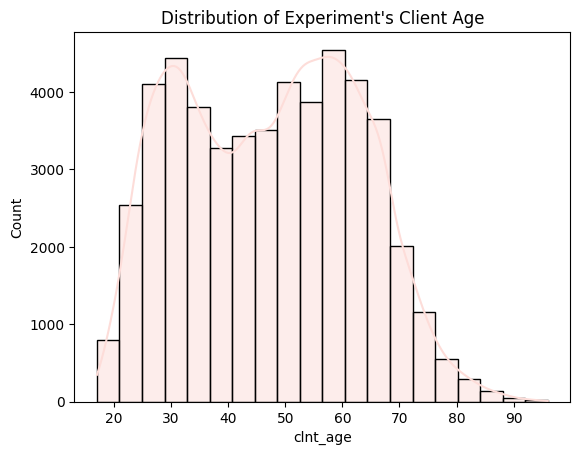

In [47]:
sns.set_palette("RdPu")
sns.histplot(final_rooster_process_counts_profile['clnt_age'], bins=20, kde=True)
plt.title("Distribution of Experiment's Client Age")
plt.show()

In [147]:
max_value = 42
final_rooster_process_counts_profile['clnt_tenure_yr']
final_rooster_process_counts_profile['clnt_tenure_yr'] = np.where(final_rooster_process_counts_profile['clnt_tenure_yr'] > max_value, np.nan, final_rooster_process_counts_profile['clnt_tenure_yr'])

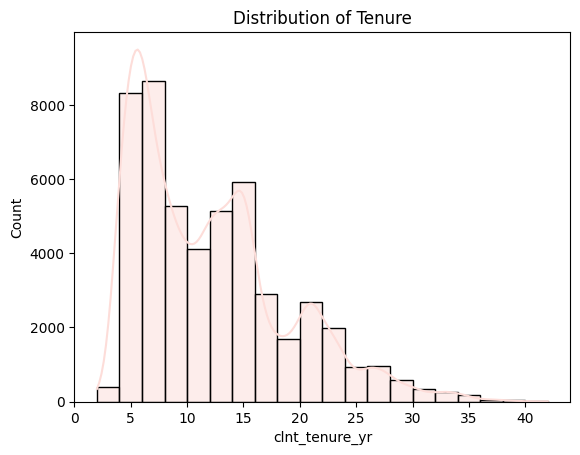

In [148]:
sns.set_palette("RdPu")
sns.histplot(final_rooster_process_counts_profile['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [49]:
final_rooster_process_counts_profile['age_group'] = pd.cut(final_rooster_process_counts_profile['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

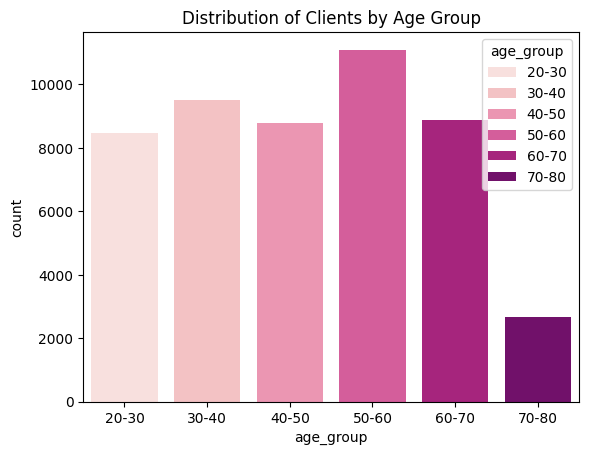

In [52]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=final_rooster_process_counts_profile, hue='age_group')
plt.title('Distribution of Clients by Age Group')

# Exploring data types & missing values

In [19]:
client_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [20]:
client_profiles.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [21]:
digital_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160786 entries, 0 to 160785
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       160786 non-null  int64         
 1   visitor_id_x    160786 non-null  object        
 2   visit_id_x      160786 non-null  object        
 3   process_step_x  160786 non-null  object        
 4   date_time_x     160786 non-null  datetime64[ns]
 5   visitor_id_y    160786 non-null  object        
 6   visit_id_y      160786 non-null  object        
 7   process_step_y  160786 non-null  object        
 8   date_time_y     160786 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 11.0+ MB


In [71]:
digital_footprints.columns

Index(['client_id', 'visitor_id_x', 'visit_id_x', 'process_step_x',
       'date_time_x', 'visitor_id_y', 'visit_id_y', 'process_step_y',
       'date_time_y'],
      dtype='object')

In [72]:
digital_footprints['date_time_x']

0         2017-04-05 16:06:35
1         2017-04-05 16:06:35
2         2017-04-05 16:06:35
3         2017-04-05 16:06:35
4         2017-04-05 16:06:35
                 ...         
160781    2017-03-31 15:15:46
160782    2017-03-31 15:14:53
160783    2017-03-31 15:12:08
160784    2017-03-31 15:11:37
160785    2017-03-31 15:10:47
Name: date_time_x, Length: 160786, dtype: object

In [10]:
experiment_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [53]:
experiment_roster.columns

Index(['client_id', 'Variation'], dtype='object')

In [87]:
client_footprints

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40


In [88]:
grouped_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35,NaN
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01,NaN
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39,NaN
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40,NaN


Observation - there are null values on test variation

In [39]:
# Spotting duplicates
grouped_data.duplicated().sum()

8887

In [40]:
grouped_data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date_time_x,date_time_y
count,1.555730e+05,155543.000000,155543.000000,155543.000000,155543.000000,1.555430e+05,155543.000000,155543.000000,155573,155573
mean,5.041359e+06,13.585253,169.027973,55.039880,2.336421,2.463716e+05,4.657837,6.829166,2017-04-11 04:51:05.182429184,2017-05-22 01:35:02.175904512
min,1.643000e+03,2.000000,34.000000,15.000000,2.000000,1.379134e+04,0.000000,1.000000,2017-03-15 00:03:03,2017-05-01 00:00:28
25%,2.564246e+06,7.000000,86.000000,45.000000,2.000000,4.923532e+04,3.000000,5.000000,2017-04-04 21:19:16,2017-05-08 19:20:10
50%,5.128835e+06,12.000000,155.000000,57.000000,2.000000,1.004957e+05,5.000000,7.000000,2017-04-10 10:43:27,2017-05-19 17:36:04
75%,7.456903e+06,19.000000,238.000000,66.000000,3.000000,2.255843e+05,6.000000,9.000000,2017-04-18 15:34:53,2017-06-03 19:23:37
max,9.999729e+06,54.000000,655.000000,93.000000,6.000000,1.632004e+07,7.000000,9.000000,2017-04-30 23:59:16,2017-06-20 23:57:06
std,2.854246e+06,7.684740,92.005690,15.947932,0.612464,6.748682e+05,2.002529,2.103210,NaN,NaN


In [41]:
# Categorical
grouped_data.select_dtypes("object").columns

Index(['gendr', 'visitor_id_x', 'visit_id_x', 'process_step_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'Variation'],
      dtype='object')

In [42]:
grouped_data.select_dtypes("object").nunique().sort_values(ascending=False)

visit_id_x        7884
visit_id_y        7101
visitor_id_x      6066
visitor_id_y      5810
process_step_x       5
process_step_y       5
gendr                4
Variation            2
dtype: int64

In [43]:
# Numerical to do 
# Client_id is usually CATEGORICAL
grouped_data.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [44]:
grouped_data.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           5289
bal                 5288
clnt_tenure_mnth     402
clnt_age             152
clnt_tenure_yr        44
logons_6_mnth          9
calls_6_mnth           8
num_accts              5
dtype: int64

In [48]:
grouped_data['Variation'].describe()

count     111079
unique         2
top         Test
freq       62904
Name: Variation, dtype: object

In [49]:
# Seeing the A/B groups
grouped_data['Variation'].value_counts()

Variation
Test       62904
Control    48175
Name: count, dtype: int64

In [50]:
# Notes 2 self:
# - Create a dataframe with a/b test subjects

In [51]:
# Questions:
1. Who are the primary clients using this online process?
 
    # gendr, bal

2. Are the primary clients younger or older, new or long-standing?

    # clnt_tenure_yr, clnt_tenure_mnth, clnt_age, 

Object `process` not found.
Object `standing` not found.


# Exploring client data

In [52]:
client_profiles.value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal        calls_6_mnth  logons_6_mnth
169        21.0            262.0             47.5      M      2.0        501570.72  4.0           4.0              1
6663225    16.0            193.0             40.5      F      2.0        47445.45   2.0           5.0              1
6664483    22.0            271.0             46.5      M      4.0        699384.16  6.0           9.0              1
6664376    17.0            207.0             64.0      M      2.0        311829.13  7.0           7.0              1
6664052    32.0            394.0             71.0      M      2.0        79642.36   0.0           4.0              1
                                                                                                                  ..
3360049    16.0            203.0             35.5      F      2.0        53572.85   0.0           3.0              1
3360254    6.0             73.0              19.0      U      2.0    

# Visualize Data

Numerical Measures: These can include coefficients, frequency counts, and other statistical metrics.

Visual Representations: Examples are histograms, scatter plots, pie charts, and more.

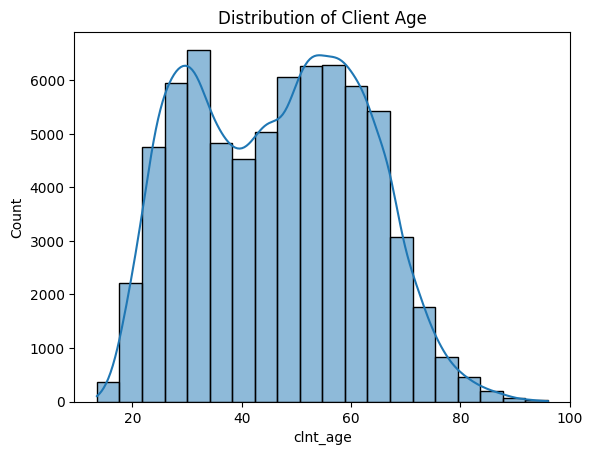

In [71]:
sns.histplot(client_profiles['clnt_age'], bins=20, kde=True)
plt.title('Distribution of Client Age')
plt.show()

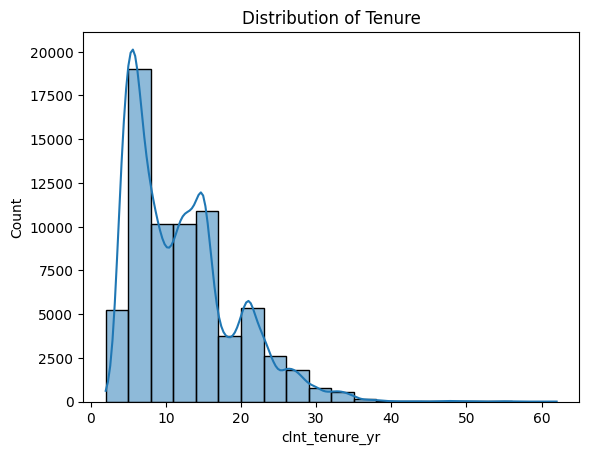

In [72]:
sns.histplot(client_profiles['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
# Vanguard has been around for 48 years, founded in 1975

In [76]:
# Segmenting Clients
client_profiles['age_group'] = pd.cut(client_profiles['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [77]:
client_profiles['age_group']

0        60-70
1        50-60
2        30-40
3        40-50
4        30-40
         ...  
70604    30-40
70605    30-40
70606    60-70
70607    60-70
70608    50-60
Name: age_group, Length: 70609, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

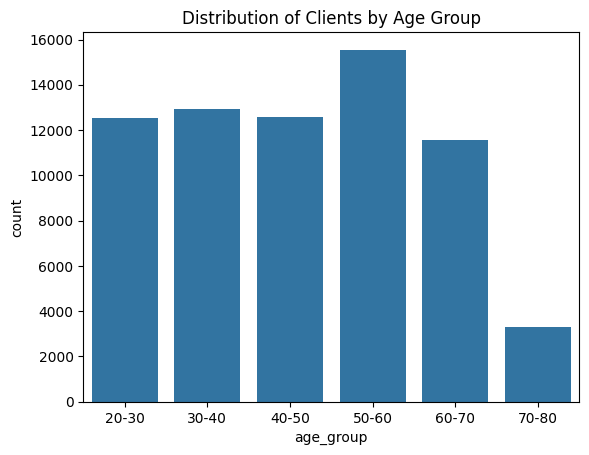

In [78]:
sns.countplot(x='age_group', data=client_profiles)
plt.title('Distribution of Clients by Age Group')

In [79]:
# Exploring Client Tenure

Text(0.5, 1.0, 'Age vs. Tenure')

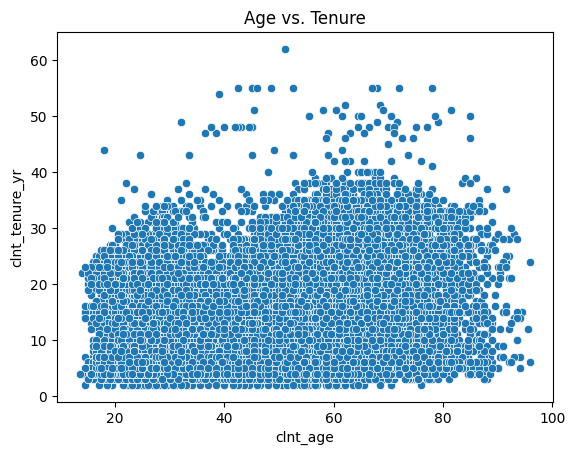

In [80]:
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=client_profiles)
plt.title('Age vs. Tenure')

In [81]:
# Comparing the groups

Text(0.5, 1.0, 'Age Distribution by A/B Test')

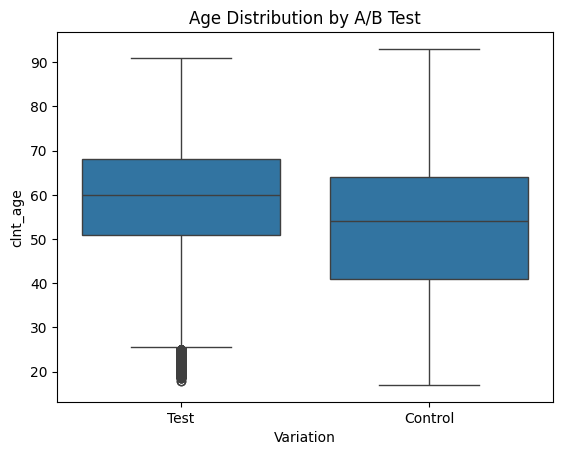

In [82]:
sns.boxplot(x='Variation', y='clnt_age', data=grouped_data)
plt.title('Age Distribution by A/B Test')

# Performing Client Behavior Analysis

In [83]:
# Key Metrics

Text(0.5, 1.0, 'Number of Logons in the Last 6 Months by Variation')

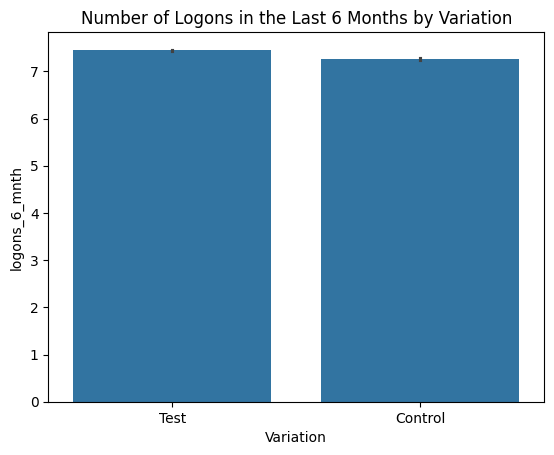

In [84]:
sns.barplot(x='Variation', y='logons_6_mnth', data=grouped_data)
plt.title('Number of Logons in the Last 6 Months by Variation')

Text(0.5, 1.0, 'Number of Calls in the Last 6 Months by Variation')

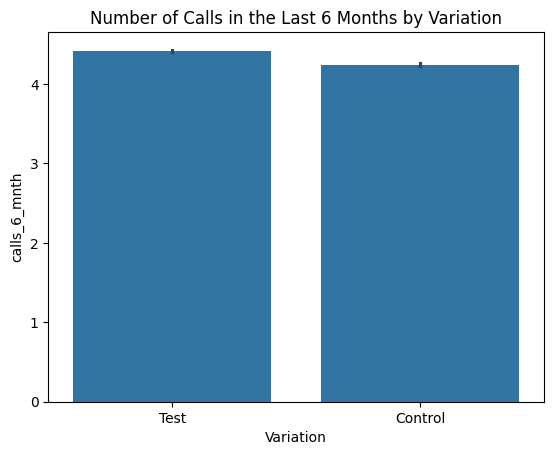

In [85]:
sns.barplot(x='Variation', y='calls_6_mnth', data=grouped_data)
plt.title('Number of Calls in the Last 6 Months by Variation')

In [ ]:
# Data for login information for each group variation during A/B testing

In [ ]:
####### This code is for interactive visualization on dashboard

In [ ]:
ab_test_data = grouped_data[(grouped_data['date_time_x'] >= '2017-03-15') & (grouped_data['date_time_x'] <= '2017-06-20')]
ab_test_data

In [63]:
grouped_data['date_time_x'].min()

Timestamp('2017-03-15 00:03:03')

In [ ]:
test_data = ab_test_data[ab_test_data['Variation'] == 'Test']
test_data

In [ ]:
control_data = ab_test_data[ab_test_data['Variation'] == 'Control']
control_data

In [ ]:
downsampled_test_data = test_data.iloc[::5]
downsampled_test_data

In [ ]:
downsampled_control_data = control_data.iloc[::5]
downsampled_control_data

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_test_data)
plt.title('Number of Visits Over Time - Test Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
plt.subplot(1, 2, 2)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_control_data)
plt.title('Number of Visits Over Time - Control Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
##########

In [90]:
conversion_rates = grouped_data.groupby('Variation')['process_step_x'].value_counts(normalize=True).unstack()
desired_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
conversion_rates = conversion_rates[desired_order]
conversion_rates

process_step_x,start,step_1,step_2,step_3,confirm
Variation,,,,,
Control,0.547151,0.201349,0.143788,0.090690,0.017021
Test,0.460464,0.240446,0.160642,0.091346,0.047104


Text(0.5, 1.0, 'Completion Rates by Process Step and Test Group')

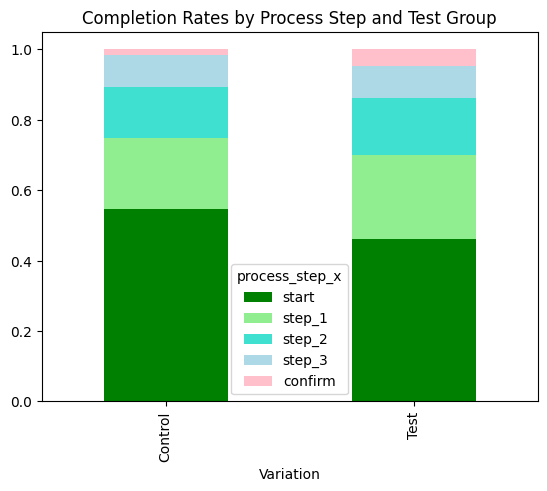

In [91]:
custom_palette = {'start': 'green', 'step_1': 'lightgreen', 'step_2': 'turquoise', 'step_3': 'lightblue', 'confirm': 'pink'}
conversion_rates.plot(kind='bar', stacked=True, color=[custom_palette[col] for col in conversion_rates.columns])
plt.title('Conversion Rates by Process Step and Variation')
plt.title('Completion Rates by Process Step and Test Group')

In [92]:
grouped_data['age_group'] = pd.cut(grouped_data['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
grouped_data['age_group']

0         30-40
1         30-40
2         30-40
3         30-40
4         30-40
          ...  
155568    30-40
155569    30-40
155570    30-40
155571    30-40
155572    30-40
Name: age_group, Length: 155573, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Number of Logons by Age Group and Test Group')

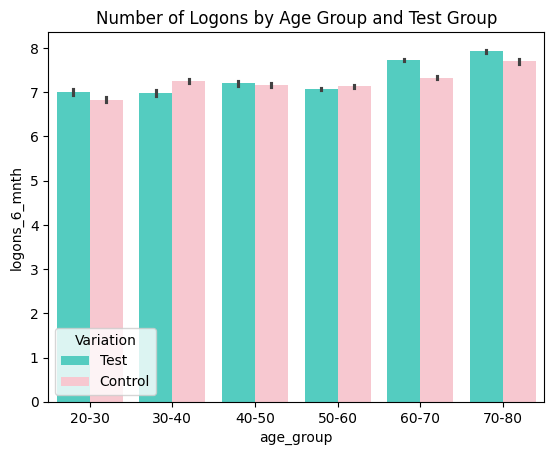

In [93]:
custom_palette = {'Test': 'turquoise', 'Control': 'pink'}

sns.barplot(x='age_group', y='logons_6_mnth', hue='Variation', data=grouped_data, palette=custom_palette)
plt.title('Number of Logons by Age Group and Test Group')

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

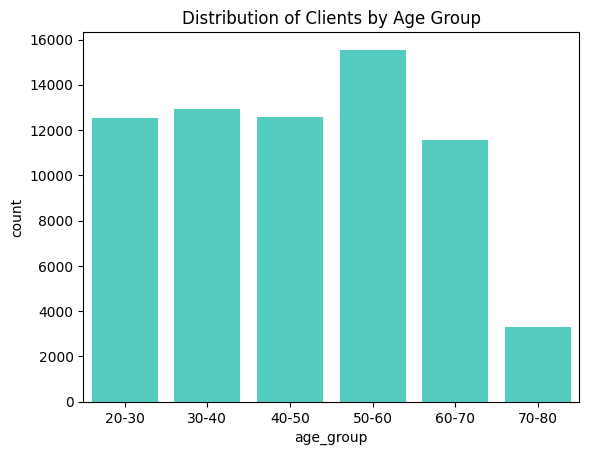

In [94]:
sns.countplot(x='age_group', data=client_profiles, color='turquoise')
plt.title('Distribution of Clients by Age Group')

In [95]:
# check the relationship of 70-80 age group and logons
# you are required to confirm if this difference is statistically significant.